In [ ]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

# Data Collection

In [ ]:
# Loading the MNIST data from keras.datasets

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


60000 images, each of which are 28x28 in dimension, since there's no extra number it means it's grayscale.

In [ ]:
# print the 10th image from X_train

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
X_train[10].shape

(28, 28)

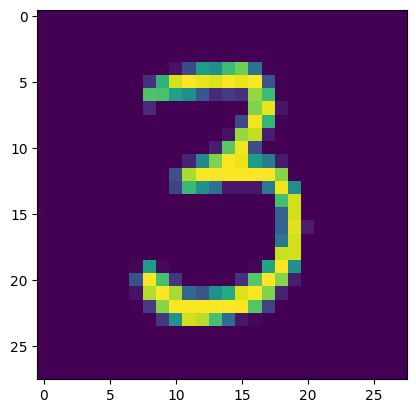

3


In [ ]:
# displaying the image

plt.imshow(X_train[50])
plt.show()

# print corresponding label
print(y_train[50])

In [ ]:
# image label analysis

print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in y_train
print(np.unique(y_train))

# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as they are or we can apply one-hot encoding

since all the images have the same dimension (28x28) then we don't need to resize it.

# Scaling the Values

So we're going to scale the values in the numpy arrays (0 to 255) to a range between 0 and 1. This will make it easier for the model to learn. ML isn't really good with large numbers.

so it's something similar to normalization and standardization

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

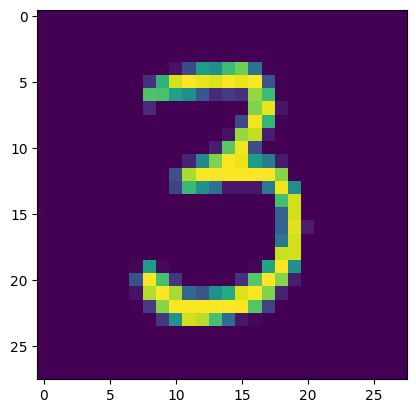

In [ ]:
plt.imshow(X_train[50])
plt.show()

# Building NN

we're not going to use CNN (Convolutional Neuralm Network) here, we'll just build a custom one for now.

In [ ]:
# setting up the layers of the NN

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer
    keras.layers.Dense(50, activation='relu'), # hidden layer
    keras.layers.Dense(50, activation='relu'), # hidden layer
    keras.layers.Dense(10, activation='sigmoid'), # output layer

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # for one-hot encoding use 'categorical_crossentropy'
    metrics=['accuracy'],
)

In [ ]:
# training the NN

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8479 - loss: 0.5124
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9541 - loss: 0.1556
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9672 - loss: 0.1113
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9751 - loss: 0.0864
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9794 - loss: 0.0703
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9833 - loss: 0.0589
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9859 - loss: 0.0494
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0422
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9887 - loss: 0.0367
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9899 - loss: 0.0337


**Training data: accuracy = 99.05%, loss = 0.0330**

check on test data for overfitting

In [ ]:
losss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9717 - loss: 0.1154


**Test data: accuracy = 97.01%, loss = 0.01188**

In [ ]:
print(X_test.shape)

(10000, 28, 28)


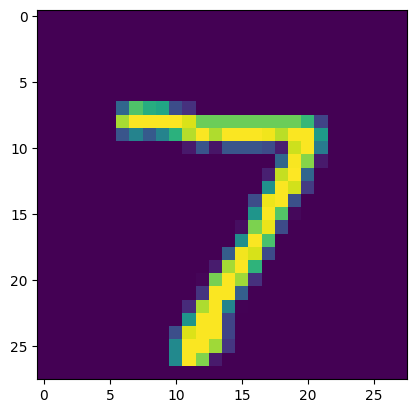

7


In [ ]:
# display the first data point in the test data

plt.imshow(X_test[0])
plt.show()
print(y_test[0])

In [ ]:
# cv2.imwrite('saved_image.png', X_test[50])

In [ ]:
# storing all the predictions of the 10000 images in X_test to see them
y_pred = model.predict(X_test)

# model.predict() fives the prediction probabilities for that particular data point, not the actual label or answer oo!!!

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
print(y_pred.shape)

(10000, 10)


In [ ]:
print(y_pred[0])

[1.6440298e-07 1.4177091e-02 7.7465422e-02 9.8158002e-01 6.6235889e-06
 3.1214687e-03 4.9683927e-14 1.0000000e+00 1.4927762e-03 6.0213625e-02]


In [ ]:
np.argmax(y_pred[0])

7

so the actual class label (answer) is 7

In [ ]:
y_pred

array([[1.6440298e-07, 1.4177091e-02, 7.7465422e-02, ..., 1.0000000e+00,
        1.4927762e-03, 6.0213625e-02],
       [2.6576443e-02, 4.8560148e-01, 9.9999243e-01, ..., 1.7553099e-10,
        1.2639986e-01, 3.7773341e-07],
       [6.3189720e-05, 9.9993140e-01, 6.2930828e-01, ..., 7.4116868e-01,
        2.4759570e-01, 3.8888317e-03],
       ...,
       [1.2260123e-09, 1.7412817e-03, 7.2521548e-06, ..., 2.9598171e-01,
        6.1261642e-01, 9.9523109e-01],
       [4.3296641e-08, 5.6245199e-06, 1.5398966e-06, ..., 2.5690472e-04,
        5.5155045e-01, 3.8941717e-09],
       [2.6848372e-06, 1.1981501e-06, 1.5369169e-01, ..., 1.4274677e-07,
        1.5468962e-03, 1.5815925e-07]], dtype=float32)

In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

these are the true labels

Building the Confusion matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_labels) # rememebr the order
print(conf_mat)

tf.Tensor(
[[ 951    0    1    0    3    3    3    3    4   12]
 [   0 1112    3    5    0    1    6    1    7    0]
 [   2    1 1000    4    4    2    3    7    9    0]
 [   0    0    1  997    2    1    0    5    2    2]
 [   0    0    4    0  959    1    4    3    3    8]
 [   2    0    0   18    1  858    4    2    4    3]
 [   3    2    3    1    3    4  939    0    2    1]
 [   2    2    9    2    0    0    2 1005    2    4]
 [   3    0    4    7    1    3    7    3  942    4]
 [   0    2    0    9   13    4    2    4    2  973]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'True labels')

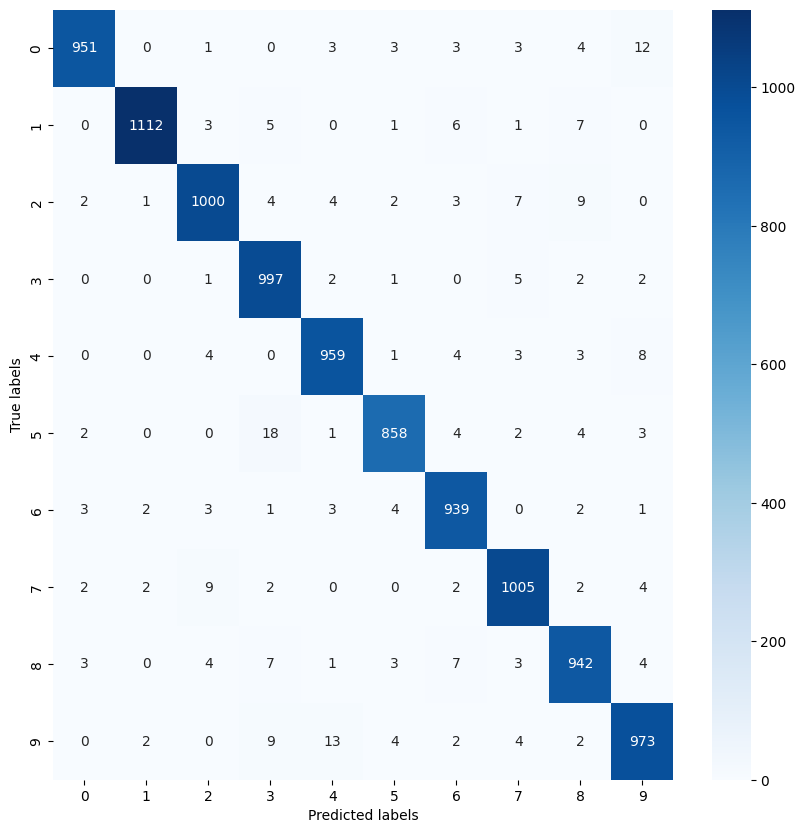

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues') # fmt='d' means you want all the values to be integers
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Usage

In [ ]:
input_img_path = '/content/mnist 5.jpeg'

input_img = cv2.imread(input_img_path)



In [ ]:
type(input_img)

numpy.ndarray

In [ ]:
print(input_img)

[[[28 28 28]
  [28 28 28]
  [28 28 28]
  ...
  [28 28 28]
  [28 28 28]
  [28 28 28]]

 [[28 28 28]
  [28 28 28]
  [28 28 28]
  ...
  [28 28 28]
  [28 28 28]
  [28 28 28]]

 [[28 28 28]
  [28 28 28]
  [28 28 28]
  ...
  [28 28 28]
  [28 28 28]
  [28 28 28]]

 ...

 [[28 28 28]
  [28 28 28]
  [28 28 28]
  ...
  [28 28 28]
  [28 28 28]
  [28 28 28]]

 [[28 28 28]
  [28 28 28]
  [28 28 28]
  ...
  [28 28 28]
  [28 28 28]
  [28 28 28]]

 [[28 28 28]
  [28 28 28]
  [28 28 28]
  ...
  [28 28 28]
  [28 28 28]
  [28 28 28]]]


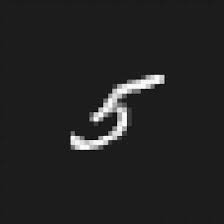

(224, 224, 3)

In [ ]:
cv2_imshow(input_img)
input_img.shape

In [ ]:
# conver image to graysclae image
grayscale = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

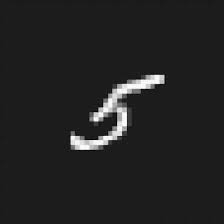

(224, 224)

In [ ]:
cv2_imshow(grayscale)
grayscale.shape

In [ ]:
# resize image

grayscale_resized = cv2.resize(grayscale, (28,28))
grayscale_resized.shape

(28, 28)

In [ ]:
cv2_imshow(grayscale_resized)

In [ ]:
# standardize the image
grayscale_resized = grayscale_resized/255

In [ ]:
# predicting image class

image_reshaped = grayscale_resized.reshape(1,28,28) # the extra '1' there is to tell the model that you're only predicting for one image, not like 20 or 10000 or more, just one.
# or image_reshaped = np.reshape(grayscale_resized, [1,28,28])

predicted_probs = model.predict(image_reshaped)

predicted_label = np.argmax(predicted_probs)

print(predicted_label)
print(predicted_probs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
8
[[0.00459026 0.0155261  0.09264444 0.9600473  0.00203525 0.3640662
  0.00714241 0.05269053 0.97642666 0.10262964]]


Compiled

Enter the image path: /content/mnist 5.jpeg


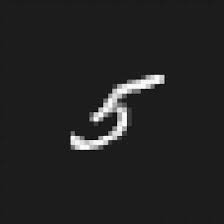

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
8


In [ ]:
input_img_path = input('Enter the image path: ')

input_img = cv2.imread(input_img_path)

cv2_imshow(input_img)

grayscale = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

grayscale_resized = cv2.resize(grayscale, (28,28))

grayscale_std = grayscale_resized/255

image_reshaped = grayscale_std.reshape(1,28,28)

predicted_probs = model.predict(image_reshaped)

predicted_label = np.argmax(predicted_probs)

print(f'The handwritten digit is recognized as: {predicted_label}')